# ESRB Rating Prediction System

In [108]:
import pandas as pd
import ipywidgets
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn import linear_model, metrics, model_selection, svm
url = "https://raw.githubusercontent.com/jemerritt/capstone/main/esrb.csv"
url2 = "https://raw.githubusercontent.com/jemerritt/capstone/main/esrbtag_counts.csv"

df = pd.read_csv(url)
df2 = pd.read_csv(url2)

mylog_model = linear_model.LogisticRegression()
mysvm_model = svm.SVC()

y = df.values[:,32]
X = df.values[:,1:32]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

mylog_model.fit(X_train, y_train)
mysvm_model.fit(X_train, y_train)

y_pred_log  = mylog_model.predict(X_test)
y_pred_svm  = mysvm_model.predict(X_test)

# Accuracy for each Model

In [109]:
print("Logistic Regression Accuracy: ", metrics.accuracy_score(y_test, y_pred_log))
print("SVM Accuracy:                 ", metrics.accuracy_score(y_test, y_pred_svm))

Logistic Regression Accuracy:  0.8453427065026362
SVM Accuracy:                  0.8506151142355008


# ESRB Tag Totals

Here we can see the number of times each tag shows up in our dataset. Blood, Fantasy Violence and No Descriptors(which actually indicates a lack of ESRB tags) comprise the highest number of tags found in our dataset.

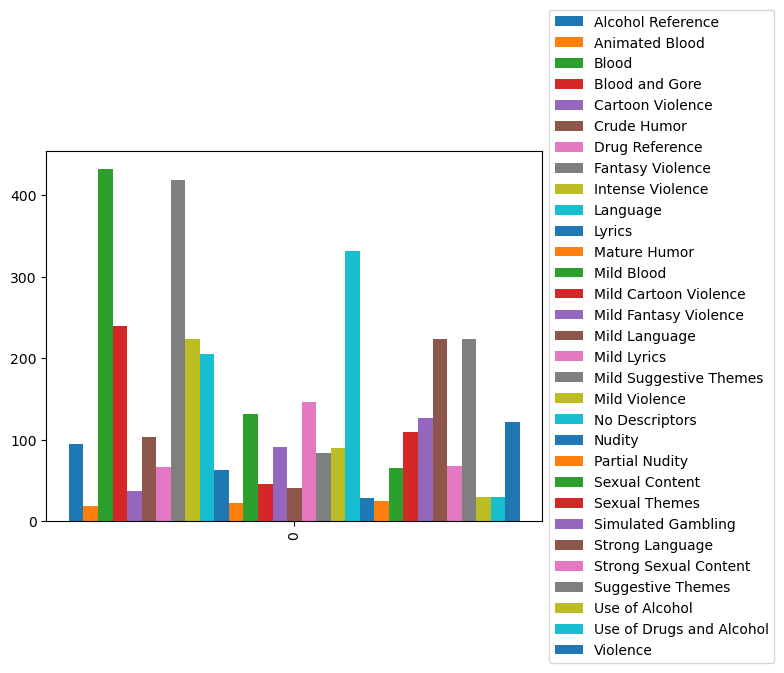

In [110]:
plt = df2.plot.bar(legend = False)
plt.autoscale()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Model Accuracy Breakdown

Here we can see the breakdown of our SVM model's accuracy. 'T' rating consistently has the highest number of incorrect predictions. 

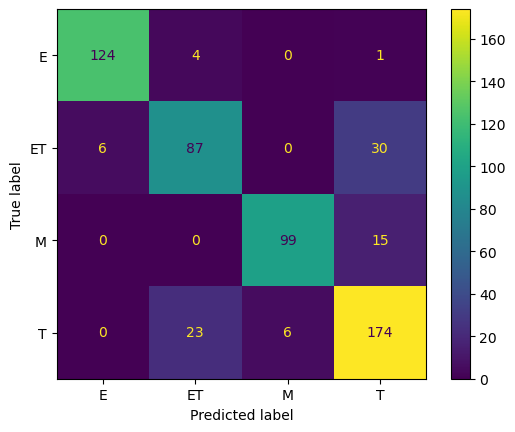

In [111]:
cm = metrics.confusion_matrix(y_test, y_pred_svm, labels=mysvm_model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mysvm_model.classes_)
disp.plot();

# ESRB Rating Counts

As we can see here games with 'T' ratings make up the bulk of our dataset while the other three rating represent roughly equal numbers. This is in line with our earlier notes regarding accuracy. As 'T' rated games are overrepresented in our dataset and hold a position in between two other ratings it is not unexpected that 'T' would be the rating catergory with the most incorrect predictions.

<Axes: ylabel='esrb_rating'>

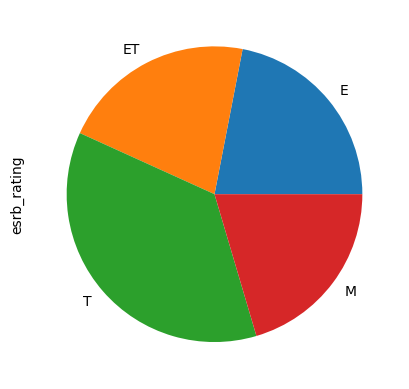

In [112]:
df['esrb_rating'].value_counts(sort=False).plot.pie(rot = 0)

# Interactive Rating Prediction System

Please select your desired tags from the list of checkboxes located at the bottom of the page and click the 'Run Interact' button.

In [113]:
from ipywidgets import Layout, interact, interact_manual, fixed

tag_a_r = ipywidgets.Checkbox(description='Alcohol Reference', style={'description_width': 'initial'})
tag_a_b = ipywidgets.Checkbox(description='Animated Blood', style={'description_width': 'initial'})
tag_b = ipywidgets.Checkbox(description='Blood', style={'description_width': 'initial'})
tag_b_a_g = ipywidgets.Checkbox(description='Blood and Gore', style={'description_width': 'initial'})
tag_c_v = ipywidgets.Checkbox(description='Cartoon Violence', style={'description_width': 'initial'})
tag_c_h = ipywidgets.Checkbox(description='Crude Humor', style={'description_width': 'initial'})
tag_d_r = ipywidgets.Checkbox(description='Drug References', style={'description_width': 'initial'})
tag_f_v = ipywidgets.Checkbox(description='Fantasy Violence', style={'description_width': 'initial'})
tag_i_v = ipywidgets.Checkbox(description='Intense Violence', style={'description_width': 'initial'})
tag_l = ipywidgets.Checkbox(description='Language', style={'description_width': 'initial'})
tag_ly = ipywidgets.Checkbox(description='Lyrics', style={'description_width': 'initial'})
tag_m_h = ipywidgets.Checkbox(description='Mature Humor', style={'description_width': 'initial'})
tag_m_b = ipywidgets.Checkbox(description='Mild Blood', style={'description_width': 'initial'})
tag_m_c_v = ipywidgets.Checkbox(description='Mild Cartoon Violence', style={'description_width': 'initial'})
tag_m_f_v = ipywidgets.Checkbox(description='Mild Fantasy Violence', style={'description_width': 'initial'})
tag_m_l = ipywidgets.Checkbox(description='Mild Language', style={'description_width': 'initial'})
tag_m_ly = ipywidgets.Checkbox(description='Mild Lyrics', style={'description_width': 'initial'})
tag_m_s_t = ipywidgets.Checkbox(description='Mild Suggestive Themes', style={'description_width': 'initial'})
tag_m_v = ipywidgets.Checkbox(description='Mild Violence', style={'description_width': 'initial'})
tag_n_d = ipywidgets.Checkbox(description='No Descriptors', style={'description_width': 'initial'})
tag_n = ipywidgets.Checkbox(description='Nudity', style={'description_width': 'initial'})
tag_p_n = ipywidgets.Checkbox(description='Partial Nudity', style={'description_width': 'initial'})
tag_s_c = ipywidgets.Checkbox(description='Sexual Content', style={'description_width': 'initial'})
tag_se_t = ipywidgets.Checkbox(description='Sexual Themes', style={'description_width': 'initial'})
tag_s_g = ipywidgets.Checkbox(description='Simulated Gambling', style={'description_width': 'initial'})
tag_s_l = ipywidgets.Checkbox(description='Strong Language', style={'description_width': 'initial'})
tag_s_s_c = ipywidgets.Checkbox(description='Strong Sexual Content', style={'description_width': 'initial'})
tag_s_t = ipywidgets.Checkbox(description='Suggestive Themes', style={'description_width': 'initial'})
tag_u_o_a = ipywidgets.Checkbox(description='Use of Alcohol', style={'description_width': 'initial'})
tag_u_o_d_a_a = ipywidgets.Checkbox(description='Use of Drugs and Alcohol', style={'description_width': 'initial'})
tag_v = ipywidgets.Checkbox(description='Violence', style={'description_width': 'initial'})

box_layout = ipywidgets.Layout(display='inline-flex',                               
                               flex_flow='wrap',
                               align_items='stretch',
                               border='solid',
                               width='100%')

cbs = ipywidgets.HBox([tag_a_r, tag_a_b, tag_b, tag_b_a_g, tag_c_v, tag_c_h, tag_d_r, tag_f_v, tag_i_v, tag_l, tag_ly, tag_m_h,
                     tag_m_b, tag_m_c_v, tag_m_f_v, tag_m_l, tag_m_ly, tag_m_s_t, tag_m_v, tag_n_d, tag_n, tag_p_n, tag_s_c,
                     tag_se_t, tag_s_g, tag_s_l, tag_s_s_c, tag_s_t, tag_u_o_a, tag_u_o_d_a_a, tag_v], layout=box_layout)

display(cbs)

def predict_rating():
    values = [] 
    a_r = 1 if tag_a_r.value == True else 0
    values.append(a_r)
    a_b = 1 if tag_a_b.value == True else 0
    values.append(a_b)
    b = 1 if tag_b.value == True else 0
    values.append(b)
    b_a_g = 1 if tag_b_a_g.value == True else 0
    values.append(b_a_g)
    c_v = 1 if tag_c_v.value == True else 0
    values.append(c_v)
    c_h = 1 if tag_c_h.value == True else 0
    values.append(c_h)
    d_r = 1 if tag_d_r.value == True else 0
    values.append(d_r)
    f_v = 1 if tag_f_v.value == True else 0
    values.append(f_v)
    i_v = 1 if tag_i_v.value == True else 0
    values.append(i_v)
    l = 1 if tag_l.value == True else 0
    values.append(l)
    ly = 1 if tag_ly.value == True else 0
    values.append(ly)
    m_h = 1 if tag_m_h.value == True else 0
    values.append(m_h)
    m_b = 1 if tag_m_b.value == True else 0
    values.append(m_b)
    m_c_v = 1 if tag_m_c_v.value == True else 0
    values.append(m_c_v)
    m_f_v = 1 if tag_m_f_v.value == True else 0
    values.append(m_f_v)
    m_l = 1 if tag_m_l.value == True else 0
    values.append(m_l)
    m_ly = 1 if tag_m_ly.value == True else 0
    values.append(m_ly)
    m_s_t = 1 if tag_m_s_t.value == True else 0
    values.append(m_s_t)
    m_v = 1 if tag_m_v.value == True else 0
    values.append(m_v)
    n_d = 1 if tag_n_d.value == True else 0
    values.append(n_d)
    n = 1 if tag_n.value == True else 0
    values.append(n)
    p_n = 1 if tag_p_n.value == True else 0
    values.append(p_n)
    s_c = 1 if tag_s_c.value == True else 0
    values.append(s_c)
    se_t = 1 if tag_se_t.value == True else 0
    values.append(se_t)
    s_g = 1 if tag_s_g.value == True else 0
    values.append(s_g)
    s_l = 1 if tag_s_l.value == True else 0
    values.append(s_l)
    s_s_c = 1 if tag_s_s_c.value == True else 0
    values.append(s_s_c)
    s_t = 1 if tag_s_t.value == True else 0
    values.append(s_t)
    u_o_a = 1 if tag_u_o_a.value == True else 0
    values.append(u_o_a)
    u_o_d_a_a = 1 if tag_u_o_d_a_a.value == True else 0
    values.append(u_o_d_a_a)
    v = 1 if tag_v.value == True else 0
    values.append(v)
    print("Predicted Rating: ", mysvm_model.predict([values]))
    #print(values)

interact_manual(predict_rating)

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

<function __main__.predict_rating()>